In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Library/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
##load the data , it is huge. Do not read again 
destinations = pd.read_csv("destinations.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
print("train dataset shape: ", train.shape)
print("test dataset shape: ", test.shape)
train.head()

('train dataset shape: ', (37670293, 24))
('test dataset shape: ', (2528243, 22))


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


<Container object of 100 artists>

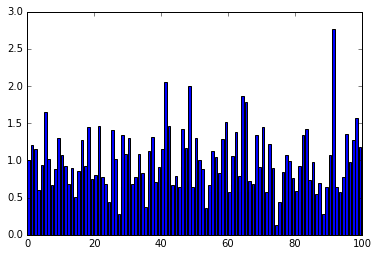

In [19]:
##check the distriubtion of the hotel cluster in the training data
%matplotlib inline 
train_cluster_distribution = train["hotel_cluster"].value_counts()
train_total = np.sum(train_cluster_distribution)
plt.bar(train_cluster_distribution.index, train_cluster_distribution/train_total*100.0 )

In [22]:
###confirm our hypothesis that all the test user ids are found in the train DataFrame.
test_ids = set(test.user_id.unique())
train_ids = set(train.user_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)

##but not all training user id are found the in the test dataset 

True

In [23]:
### convert the date time to year, month 
train["date_time"] = pd.to_datetime(train["date_time"])
train["year"] = train["date_time"].dt.year
train["month"] = train["date_time"].dt.month

In [29]:
##only pick 10000 users 
import random

unique_users = train.user_id.unique()

print("Number of unique users ",unique_users.shape[0])

sel_user_ids = [unique_users[i] for i in sorted(random.sample(range(len(unique_users)), 100000)) ]
sel_train = train[train.user_id.isin(sel_user_ids)]

('Number of unique users ', 1198786)


In [30]:
###Pick new training and testing sets and remove click events 
t1 = sel_train[((sel_train.year == 2013) | ((sel_train.year == 2014) & (sel_train.month < 8)))]
t2 = sel_train[((sel_train.year == 2014) & (sel_train.month >= 8))]
t2 = t2[t2.is_booking == True]
print("new training set number: ", t1.shape[0])
print("new test set number: ", t2.shape[0])

('new training set number: ', 1997933)
('new test set number: ', 82660)


In [5]:
##save the t1, t2 file for the future reuse 
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

pickle_file = 'expedia_small_dataset.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'small_train_dataset': t1,
    'small_test_dataset': t2,
    'destinations': destinations,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [2]:
## direct read the small test set and training set from the pickle file
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

pickle_file = 'expedia_small_dataset.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  t1 = save['small_train_dataset']
  t2 = save['small_test_dataset']
  destinations = save['destinations']
  del save  # hint to help gc free up memory
  print('Small training set', t1.shape)
  print('Small test set', t2.shape)
  print('destinations', destinations.shape)

('Small training set', (1997933, 26))
('Small test set', (82660, 26))
('destinations', (62106, 150))


In [7]:
##PCA analysis on the destinations 
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
dest_small = pca.fit_transform(destinations[["d{0}".format(i + 1) for i in range(149)]])
dest_small = pd.DataFrame(dest_small)
dest_small["srch_destination_id"] = destinations["srch_destination_id"]

In [8]:
##Generate new date features based on date_time, srch_ci, and srch_co.
##Remove non-numeric columns like date_time.
##Add in features from dest_small.
##Replace any missing values with -1.

def calc_fast_features(df):
    df["date_time"] = pd.to_datetime(df["date_time"])
    df["srch_ci"] = pd.to_datetime(df["srch_ci"], format='%Y-%m-%d', errors="coerce")
    df["srch_co"] = pd.to_datetime(df["srch_co"], format='%Y-%m-%d', errors="coerce")
    
    props = {}
    for prop in ["month", "day", "hour", "minute", "dayofweek", "quarter"]:
        props[prop] = getattr(df["date_time"].dt, prop)
    
    carryover = [p for p in df.columns if p not in ["date_time", "srch_ci", "srch_co"]]
    for prop in carryover:
        props[prop] = df[prop]
    
    date_props = ["month", "day", "dayofweek", "quarter"]
    for prop in date_props:
        props["ci_{0}".format(prop)] = getattr(df["srch_ci"].dt, prop)
        props["co_{0}".format(prop)] = getattr(df["srch_co"].dt, prop)
    props["stay_span"] = (df["srch_co"] - df["srch_ci"]).astype('timedelta64[h]')
        
    ret = pd.DataFrame(props)
    
    ret = ret.join(dest_small, on="srch_destination_id", how='left', rsuffix="dest")
    ret = ret.drop("srch_destination_iddest", axis=1)
    return ret

df = calc_fast_features(t1)
df.fillna(-1, inplace=True)


In [9]:
df.head()

,channel,ci_day,ci_dayofweek,ci_month,ci_quarter,cnt,co_day,co_dayofweek,co_month,co_quarter,...,srch_rm_cnt,stay_span,user_id,user_location_city,user_location_country,user_location_region,year,0,1,2
2248,2,1.0,4.0,8.0,3.0,1,6.0,2.0,8.0,3.0,...,1,120.0,9701,53434,69,756,2014,-0.44879,0.263463,-0.051078
2249,2,1.0,4.0,8.0,3.0,1,4.0,0.0,8.0,3.0,...,1,72.0,9701,53434,69,756,2014,-0.44879,0.263463,-0.051078
2250,2,1.0,4.0,8.0,3.0,1,4.0,0.0,8.0,3.0,...,1,72.0,9701,53434,69,756,2014,-0.44879,0.263463,-0.051078
2430,0,18.0,6.0,8.0,3.0,1,23.0,4.0,8.0,3.0,...,1,120.0,11176,49887,68,335,2013,-0.44879,0.263463,-0.051078
2431,0,19.0,0.0,8.0,3.0,1,23.0,4.0,8.0,3.0,...,1,96.0,11176,49887,68,335,2013,-0.44879,0.263463,-0.051078


In [17]:
##since machine learning way doesn't work, try another techiques 
def make_key(items):
    return "_".join([str(i) for i in items])

match_cols = ["srch_destination_id"]
cluster_cols = match_cols + ['hotel_cluster']
groups = t1.groupby(cluster_cols)
top_clusters = {}
for name, group in groups:
    clicks = len(group.is_booking[group.is_booking == False])
    bookings = len(group.is_booking[group.is_booking == True])
    
    score = bookings + .15 * clicks
    
    clus_name = make_key(name[:len(match_cols)])
    if clus_name not in top_clusters:
        top_clusters[clus_name] = {}
    top_clusters[clus_name][name[-1]] = score

In [19]:
import operator

cluster_dict = {}
for n in top_clusters:
    tc = top_clusters[n]
    top = [l[0] for l in sorted(tc.items(), key=operator.itemgetter(1), reverse=True)[:5]]
    cluster_dict[n] = top

preds = []
for index, row in t2.iterrows():
    key = make_key([row[m] for m in match_cols])
    if key in cluster_dict:
        preds.append(cluster_dict[key])
    else:
        preds.append([])

In [9]:
###access the MAPK score
import ml_metrics as metrics
metrics.mapk([[l] for l in t2["hotel_cluster"]], preds, k=5)

NameError: name 'preds' is not defined

In [160]:
match_cols = ['user_location_country', 'user_location_region', 'user_location_city', 'hotel_market', 'orig_destination_distance']

def generate_exact_matches(row, match_cols, groups):
    index = tuple([row[t] for t in match_cols])
    try:
        group = groups.get_group(index)
    except Exception:
        return []
    clus = list(set(group.hotel_cluster))
    return clus

exact_matches = []
groups = t1.groupby(match_cols)
for i in range(t2.shape[0]):
    exact_matches.append(generate_exact_matches(t2.iloc[i], match_cols, groups))

('exact matches number: ', 82660)


In [197]:
most_common_clusters = list(t1.hotel_cluster.value_counts().head().index)

def f5(seq, idfun=None): 
    if idfun is None:
        def idfun(x): return x
    seen = {}
    result = []
    for item in seq:
        marker = idfun(item)
        if marker in seen: continue
        seen[marker] = 1
        result.append(item)
    return result
    
full_preds = [f5(exact_matches[p] + preds[p] + most_common_clusters)[:5] for p in range(len(preds))]
metrics.mapk([[l] for l in t2["hotel_cluster"]], full_preds, k=5)

0.37275586740866201

In [ ]:
###submit file
write_p = [" ".join([str(l) for l in p]) for p in full_preds]
write_frame = ["{0},{1}".format(t2["id"][i], write_p[i]) for i in range(len(full_preds))]
write_frame = ["id,hotel_clusters"] + write_frame
with open("predictions.csv", "w+") as f:
    f.write("\n".join(write_frame))
    

In [141]:
## only use the match part, the accuracy is very high !!
finalResult = pd.concat([ t2.hotel_cluster, pd.DataFrame(exact_matches, index = t2.index)], axis = 1)
finalResult_dropNA = finalResult.dropna(thresh=2)
metrics.mapk([[l] for l in finalResult_dropNA["hotel_cluster"]], finalResult_dropNA[[0,1,2,3]].values.tolist(), k=4)

0.87408143127937465

In [195]:
print('The match sample inside the small test sample:', finalResult_dropNA.shape[0])
print('small test sample size: ', t2.shape[0])
print('small test sample have orgi destination distance: ', t2.orig_destination_distance.count())

('The match sample inside the small test sample:', 12837)
('small test sample size: ', 82660)
('small test sample have orgi destination distance: ', 53707)


In [202]:
### round orig_destination_distance
import numpy as np
t1['orig_destination_distance_3_decimal'] = t1['orig_destination_distance'].round(3)
t1['orig_destination_distance_2_decimal'] = t1['orig_destination_distance'].round(2)
t1['orig_destination_distance_1_decimal'] = t1['orig_destination_distance'].round(1)

t2['orig_destination_distance_3_decimal'] = t2['orig_destination_distance'].round(3)
t2['orig_destination_distance_2_decimal'] = t2['orig_destination_distance'].round(2)
t2['orig_destination_distance_1_decimal'] = t2['orig_destination_distance'].round(1)

match_cols = ['user_location_country', 'user_location_region', 'user_location_city', 'hotel_market', 'orig_destination_distance_1_decimal']

exact_matches_on_1_decimal = []
groups = t1.groupby(match_cols)
for i in range(t2.shape[0]):
    exact_matches_on_1_decimal.append(generate_exact_matches(t2.iloc[i], match_cols, groups))

##******try differnt rounding decimal, exact match generate best result*************
benchmark_preds = [f5(exact_matches[p]+ preds[p] + most_common_clusters)[:5] for p in range(len(preds))]
print(metrics.mapk([[l] for l in t2["hotel_cluster"]], benchmark_preds, k=5))


model_1_preds = [f5(exact_matches[p] + preds[p] + exact_matches_on_1_decimal[p] + most_common_clusters)[:5] for p in range(len(preds))]
print(metrics.mapk([[l] for l in t2["hotel_cluster"]], model_1_preds, k=5))




0.372755867409
0.372769779821


In [153]:
### use another method to detect the data leakage 

import datetime
from heapq import nlargest
from operator import itemgetter
from collections import defaultdict


def prepare_arrays_match(traindata):
    best_hotels_od_ulc = defaultdict(lambda: defaultdict(int))
    best_hotels_search_dest = defaultdict(lambda: defaultdict(int))
    popular_hotel_cluster = defaultdict(int)
    count_empty = 0
    print("Start to prepare!")  
    
    # Calc counts
    for index, row in traindata.iterrows(): 
                  
        if row.user_location_city != '' and row.orig_destination_distance != '':
            s1 = (row.user_location_city, row.orig_destination_distance)

            if s1 in best_hotels_od_ulc:
                if row.hotel_cluster in best_hotels_od_ulc[s1]:
                    best_hotels_od_ulc[s1][row.hotel_cluster] += 1
                else:
                    best_hotels_od_ulc[s1][row.hotel_cluster] = 1
            else:
                best_hotels_od_ulc[s1] = dict()
                best_hotels_od_ulc[s1][row.hotel_cluster] = 1
        #model 2
        if row.srch_destination_id != '' and row.hotel_country != '' and row.hotel_market != '':
            s2 = (row.srch_destination_id,row.hotel_country, row.hotel_market)
            if s2 in best_hotels_search_dest:
                if row.hotel_cluster in best_hotels_search_dest[s2]:
                    best_hotels_search_dest[s2][row.hotel_cluster] += row.is_booking*1 + (1-row.is_booking)*0.15
                else:
                    best_hotels_search_dest[s2][row.hotel_cluster] = row.is_booking*1 + (1-row.is_booking)*0.15
            else:
                best_hotels_search_dest[s2] = dict()
                best_hotels_search_dest[s2][row.hotel_cluster] = row.is_booking*1 + (1-row.is_booking)*0.15
        
#         #model 1        
#         if row.hotel_cluster in popular_hotel_cluster:
#             popular_hotel_cluster[row.hotel_cluster] += 1
#         else:
#             popular_hotel_cluster[row.hotel_cluster] = 1
            
        if row.is_package != '':
            s3 = (row.is_package)
            if s3 in popular_hotel_cluster:
                if row.hotel_cluster in popular_hotel_cluster[s3]:
                    popular_hotel_cluster[s3][row.hotel_cluster] += 1
                else:
                    popular_hotel_cluster[s3][row.hotel_cluster] = 1
            else:
                popular_hotel_cluster[s3] = dict()
                popular_hotel_cluster[s3][row.hotel_cluster] = 1
    
    return best_hotels_od_ulc, best_hotels_search_dest, popular_hotel_cluster


def gen_submission(best_hotels_search_dest, best_hotels_od_ulc, popular_hotel_cluster, testdata):
    print('Generate submission...')
    now = datetime.datetime.now()
    total = 0
    topclasters = nlargest(5, sorted(popular_hotel_cluster.items()), key=itemgetter(1))
    result = [] 
    for index, row in testdata.iterrows():
        total += 1
        if total % 100000 == 0:
            print('Read {} lines...'.format(total))
        
        filled = []

        s1 = (row.user_location_city, row.orig_destination_distance)
        if s1 in best_hotels_od_ulc:
            d = best_hotels_od_ulc[s1]
            topitems = nlargest(5, sorted(d.items()), key=itemgetter(1))
            for i in range(len(topitems)):
                if topitems[i][0] in filled:
                    continue
                if len(filled) == 5:
                    break
                filled.append(topitems[i][0])

        s2 = (row.srch_destination_id,row.hotel_country, row.hotel_market)
        if s2 in best_hotels_search_dest:
            d = best_hotels_search_dest[s2]
            topitems = nlargest(4, d.items(), key=itemgetter(1))
            for i in range(len(topitems)):
                if topitems[i][0] in filled:
                    continue
                if len(filled) == 4:
                    break
                filled.append(topitems[i][0])

        ##model 2
        s3 = (row.is_package)
        if s3 in popular_hotel_cluster:
            d = popular_hotel_cluster[s3]
            topitems = nlargest(5, d.items(), key=itemgetter(1))
            for i in range(len(topitems)):
                if topitems[i][0] in filled:
                    continue
                if len(filled) == 5:
                    break
                filled.append(topitems[i][0])
                
#         #model 1                
#         for i in range(len(topclasters)):
#             if topclasters[i][0] in filled:
#                 continue
#             if len(filled) == 5:
#                 break
#             filled.append(topclasters[i][0])  
            
        result.append(filled)
    print("Completed!")    
    return result


In [154]:
import ml_metrics as metrics
best_hotels_od_ulc, best_hotels_search_dest, popular_hotel_cluster = prepare_arrays_match(t1)


Start to prepare!


In [127]:
##orignal model 
model_pred = gen_submission(best_hotels_search_dest, best_hotels_od_ulc, popular_hotel_cluster,t2)
print(metrics.mapk([[l] for l in t2["hotel_cluster"]], model_pred, k=5))

Generate submission...
Completed!
0.378393217195


In [155]:
model_2_pred = gen_submission(best_hotels_search_dest, best_hotels_od_ulc, popular_hotel_cluster,t2)
print(metrics.mapk([[l] for l in t2["hotel_cluster"]], model_2_pred, k=5))

Generate submission...
Completed!
0.371383579321


In [85]:
finalResult = pd.concat([ t2.hotel_cluster, pd.DataFrame(model_2_pred, index = t2.index)], axis = 1)
finalResult_dropNA = finalResult.dropna(thresh=2)
metrics.mapk([[l] for l in finalResult_dropNA["hotel_cluster"]], finalResult_dropNA[[0,1,2,3]].values.tolist(), k=5)

0.88202611833735756

In [152]:
best_hotels_search_dest

defaultdict(<function __main__.<lambda>>,
            {(43512, 50, 369): {48: 0.15, 58: 0.3, 92: 0.15},
             (22521, 63, 1256): {58: 0.15,
              62: 0.15,
              63: 1.3,
              82: 1.5999999999999996},
             (50431, 159, 287): {6: 0.44999999999999996, 61: 0.15},
             (52048, 105, 1853): {8: 0.15, 44: 0.44999999999999996, 62: 0.15},
             (1808, 198, 1670): {5: 0.3,
              7: 1.05,
              10: 0.15,
              13: 3.0499999999999994,
              14: 0.3,
              16: 0.6,
              28: 2.9,
              37: 0.15,
              50: 1.05,
              63: 0.6,
              73: 0.9,
              76: 0.15,
              82: 0.9,
              89: 0.15},
             (44383, 31, 1918): {44: 0.15},
             (42057, 105, 892): {20: 0.44999999999999996, 30: 0.15, 53: 0.15},
             (12643, 77, 1895): {30: 0.15, 62: 0.15, 81: 0.44999999999999996},
             (55640, 77, 21): {85: 0.15, 90: 0.15},
     

In [77]:
len([[x] for x in model_2_pred if x != []])

82660

In [145]:
df_agg = t1.groupby(['srch_destination_id', 'hotel_country','hotel_market', 'hotel_cluster'])['year'].agg({'count':'count'})

In [146]:
g = df_agg['count'].groupby(level=0, group_keys=False)

In [147]:
g.nlargest(10)

srch_destination_id  hotel_country  hotel_market  hotel_cluster
1                    76             1537          20                3
                                                  60                2
4                    7              246           25               10
                                                  82               10
                                                  67                8
                                                  78                8
                                                  32                7
                                                  81                7
                                                  58                4
                                                  30                3
                                                  38                3
                                                  40                3
8                    50             416           48               23
                          

In [144]:
t1[ (t1.user_id == 1198771) & (t1.hotel_country== 50) &(t1.hotel_market == 699)][['date_time', 'is_booking', 'hotel_cluster']]

,date_time,is_booking,hotel_cluster
10923192,2014-07-05 08:59:02,0,39
10923193,2014-07-05 09:00:42,0,23
10923194,2014-07-07 06:14:17,0,39
10923195,2014-07-07 06:14:27,0,39
10923196,2014-07-07 06:15:31,0,39
10923197,2014-07-07 06:15:44,0,39
10923198,2014-07-07 06:16:24,0,77
